In [1]:
#smalldata transformer
import math
import tensorflow as tf
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import os
import pickle
import sklearn.metrics as skl
from sklearn.model_selection import train_test_split
import gc
import tensorflow_addons as tfa

In [2]:
#load data
label_dict = {0 : "no_sub", 1 : "sub"}
with open('imgs.pkl', 'rb') as f:
    imgs = pickle.load(f)
with open('labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [3]:
#pre processing
rescale = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1 / 255)
])
one_hot_fun = tf.keras.Sequential([
    tf.keras.layers.CategoryEncoding(num_tokens=2, output_mode="one_hot")
])

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.1, shuffle=True)

train_imgs = rescale(train_imgs)
test_imgs = rescale(test_imgs)
train_labels = one_hot_fun(train_labels)
test_labels = one_hot_fun(test_labels)

In [4]:
#load model
model = tf.keras.models.load_model('lowdata_trans_1')

32/32 [==============================] - 3s 32ms/step - loss: 0.0564 - categorical_accuracy: 0.9840
ROC AUC score: 0.9985637184888239


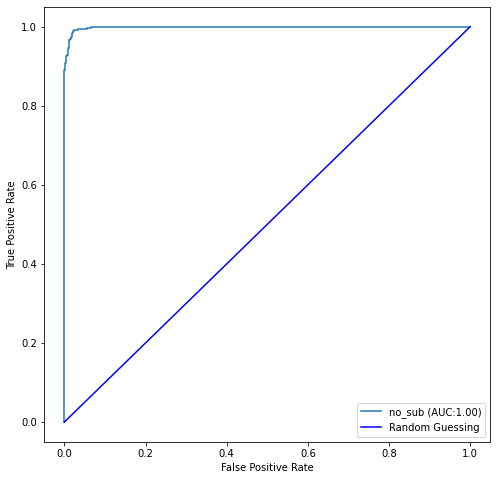

In [5]:
#predict and plot
pred_label = model.predict(test_imgs)
eval = model.evaluate(test_imgs,test_labels)
fig, c_ax = plt.subplots(1,1, figsize = (8, 8))

fpr , tpr , thresholds = skl.roc_curve (np.array(test_labels[:,0]), np.array(pred_label[:,0]))
c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label_dict[0], skl.auc(fpr, tpr)))
c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
print('ROC AUC score:', skl.roc_auc_score(np.array(test_labels), np.array(pred_label)))
plt.savefig('ROC_transformer.png')
plt.show()